In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 

# Data Exploration 

In [2]:
data = pd.read_csv('Raw_Housing_Prices.csv')
data.head() # To skim through the data

,ID,Date House was Sold,Sale Price,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,Waterfront View,No of Times Visited,...,Overall Grade,Area of the House from Basement (in Sqft),Basement Area (in Sqft),Age of House (in Years),Renovated Year,Zipcode,Latitude,Longitude,Living Area after Renovation (in Sqft),Lot Area after Renovation (in Sqft)
0,7129300520,14 October 2017,221900.0,3,1.00,1180.0,5650.0,1.0,No,None,...,7,1180.0,0,63,0,98178.0,47.5112,-122.257,1340.0,5650
1,6414100192,14 December 2017,538000.0,3,2.25,2570.0,7242.0,2.0,No,None,...,7,2170.0,400,67,1991,98125.0,47.7210,-122.319,1690.0,7639
2,5631500400,15 February 2016,180000.0,2,1.00,770.0,10000.0,1.0,No,None,...,6,770.0,0,85,0,98028.0,47.7379,-122.233,2720.0,8062
3,2487200875,14 December 2017,604000.0,4,3.00,1960.0,5000.0,1.0,No,None,...,7,1050.0,910,53,0,98136.0,47.5208,-122.393,1360.0,5000
4,1954400510,15 February 2016,510000.0,3,2.00,1680.0,8080.0,1.0,No,None,...,8,1680.0,0,31,0,98074.0,47.6168,-122.045,1800.0,7503


In [3]:
data.info() # To skim through the counts and datatypes of the DataFrame 'data'

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   ID                                         21613 non-null  int64  
 1   Date House was Sold                        21613 non-null  object 
 2   Sale Price                                 21609 non-null  float64
 3   No of Bedrooms                             21613 non-null  int64  
 4   No of Bathrooms                            21609 non-null  float64
 5   Flat Area (in Sqft)                        21604 non-null  float64
 6   Lot Area (in Sqft)                         21604 non-null  float64
 7   No of Floors                               21613 non-null  float64
 8   Waterfront View                            21613 non-null  object 
 9   No of Times Visited                        21613 non-null  object 
 10  Condition of the House

In [4]:
data.isnull().sum() # To keep track the quantity of missing values in different columns

ID                                           0
Date House was Sold                          0
Sale Price                                   4
No of Bedrooms                               0
No of Bathrooms                              4
Flat Area (in Sqft)                          9
Lot Area (in Sqft)                           9
No of Floors                                 0
Waterfront View                              0
No of Times Visited                          0
Condition of the House                       0
Overall Grade                                0
Area of the House from Basement (in Sqft)    3
Basement Area (in Sqft)                      0
Age of House (in Years)                      0
Renovated Year                               0
Zipcode                                      1
Latitude                                     1
Longitude                                    1
Living Area after Renovation (in Sqft)       1
Lot Area after Renovation (in Sqft)          0
dtype: int64

## Treating Outliers

### To get an idea on the existence of outlier and its quantity
### we've to plot a boxplot first because it tells us these informations very clearly

Text(0.5, 1.0, 'Boxplot to view the distribution of Sale Price and the outliers')

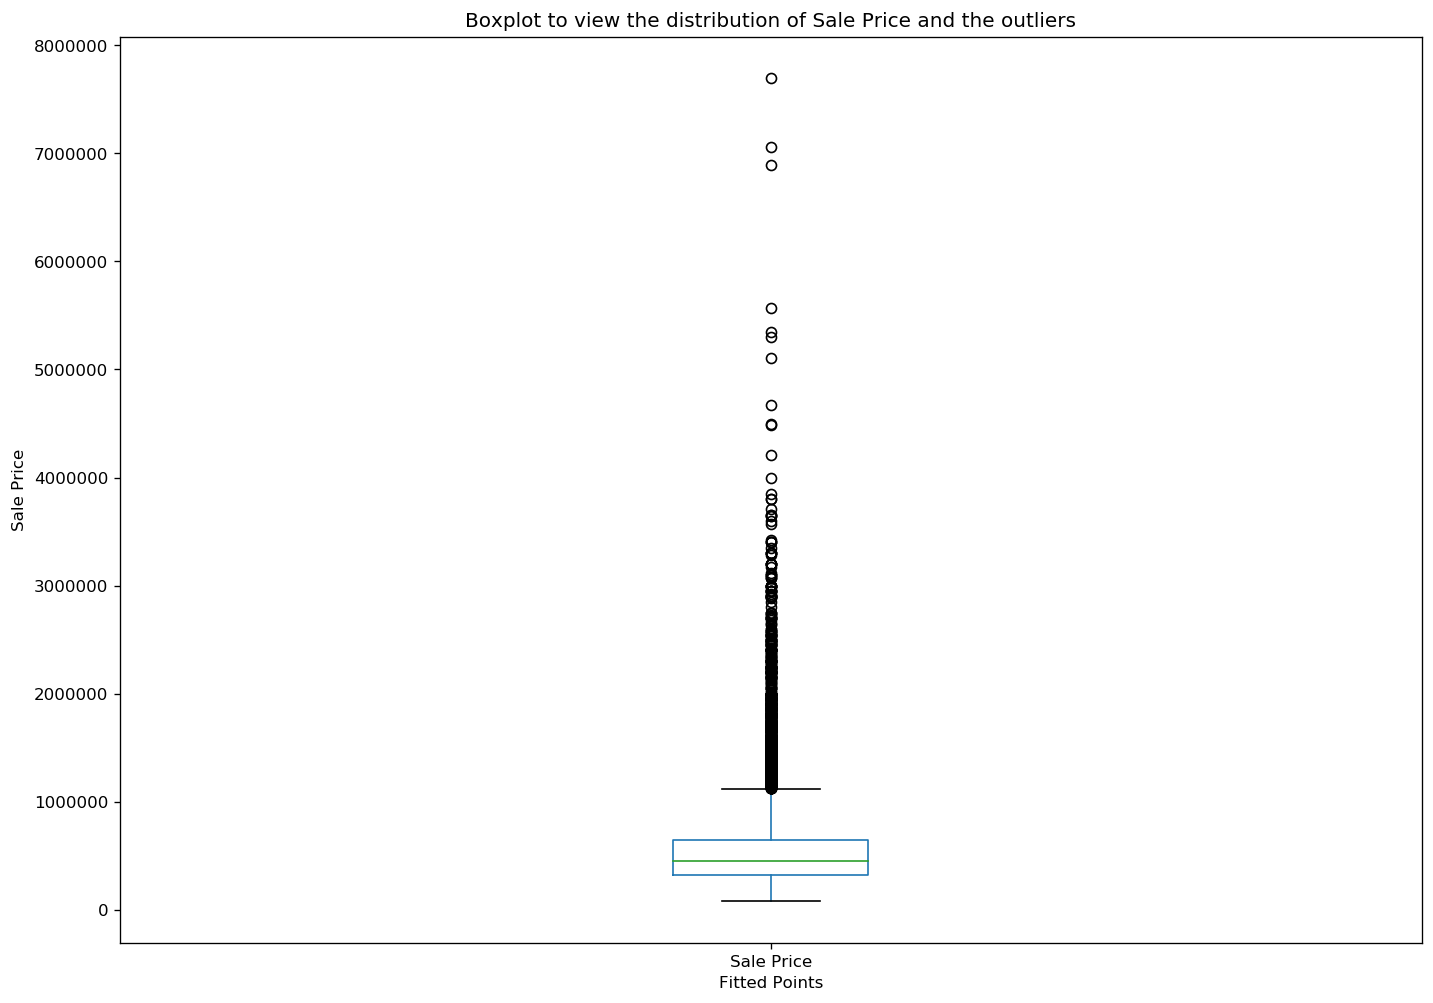

In [5]:
#%matplotlib notebook 
plt.figure(dpi=120,figsize=(14,10))

data['Sale Price'].plot(kind='box')
plt.ylabel('Sale Price')
plt.xlabel('Fitted Points')
plt.title('Boxplot to view the distribution of Sale Price and the outliers')

### As, it can be noticed that there's a lot Sale Price value, more than the maximum value of that, exisits, we must impute this outliers for better feeding of our regression model.

In [6]:
data['Sale Price'].describe() # This gives us all necessary statistical information 

count    2.160900e+04
mean     5.401984e+05
std      3.673890e+05
min      7.500000e+04
25%      3.219500e+05
50%      4.500000e+05
75%      6.450000e+05
max      7.700000e+06
Name: Sale Price, dtype: float64

In [7]:
q1 =  data['Sale Price'].describe()[4] # First Quartile
q1

321950.0

In [8]:
Me = data['Sale Price'].describe()[5] # Second Quartile/Median
Me

450000.0

In [9]:
q3 = data['Sale Price'].describe()[6] # Third Quartile
q3

645000.0

In [10]:
IQR = q3 - q1 # Inter-quartile Range
IQR

323050.0

In [11]:
upper_limit = q3 + IQR*1.5
upper_limit

1129575.0

In [12]:
lower_limit = q1 - IQR*1.5
lower_limit

-162625.0

### To create an copy of the main Dataset so that we retreive the older data in necessary

In [13]:
df = data.copy()

In [14]:
# Defining a function to treat outlier
def treat_outliers(value):
    if value>upper_limit:
        return upper_limit
    elif value<lower_limit:
        return lower_limit
    else:
        return value

In [15]:
# Implementing the Imputer Function
df['Sale Price'] = df['Sale Price'].map(treat_outliers)
print(data['Sale Price'].describe())
df['Sale Price'].describe()

count    2.160900e+04
mean     5.401984e+05
std      3.673890e+05
min      7.500000e+04
25%      3.219500e+05
50%      4.500000e+05
75%      6.450000e+05
max      7.700000e+06
Name: Sale Price, dtype: float64


count    2.160900e+04
mean     5.116186e+05
std      2.500620e+05
min      7.500000e+04
25%      3.219500e+05
50%      4.500000e+05
75%      6.450000e+05
max      1.129575e+06
Name: Sale Price, dtype: float64

## Missing value treatment

### To treat missing values in Sale Price(Target Variable), it's better to remove those rows containing missing values.

In [16]:
df.dropna(subset=['Sale Price'], how='any', inplace=True, axis=0)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21609 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   ID                                         21609 non-null  int64  
 1   Date House was Sold                        21609 non-null  object 
 2   Sale Price                                 21609 non-null  float64
 3   No of Bedrooms                             21609 non-null  int64  
 4   No of Bathrooms                            21605 non-null  float64
 5   Flat Area (in Sqft)                        21600 non-null  float64
 6   Lot Area (in Sqft)                         21600 non-null  float64
 7   No of Floors                               21609 non-null  float64
 8   Waterfront View                            21609 non-null  object 
 9   No of Times Visited                        21609 non-null  object 
 10  Condition of the House

In [17]:
# The remaining missing values should be treated
df.isnull().sum()

ID                                           0
Date House was Sold                          0
Sale Price                                   0
No of Bedrooms                               0
No of Bathrooms                              4
Flat Area (in Sqft)                          9
Lot Area (in Sqft)                           9
No of Floors                                 0
Waterfront View                              0
No of Times Visited                          0
Condition of the House                       0
Overall Grade                                0
Area of the House from Basement (in Sqft)    3
Basement Area (in Sqft)                      0
Age of House (in Years)                      0
Renovated Year                               0
Zipcode                                      1
Latitude                                     1
Longitude                                    1
Living Area after Renovation (in Sqft)       1
Lot Area after Renovation (in Sqft)          0
dtype: int64

### To treat the missing data of the independent variable we have to impute the missing values with median

In [18]:
num_col = ['No of Bathrooms',
           'Flat Area (in Sqft)',
           'Lot Area (in Sqft)',
           'Area of the House from Basement (in Sqft)',
           'Latitude',
           'Longitude',
           'Living Area after Renovation (in Sqft)']

In [19]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan, strategy='median')
df[num_col] = imputer.fit_transform(df[num_col])
print(df.info())
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21609 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   ID                                         21609 non-null  int64  
 1   Date House was Sold                        21609 non-null  object 
 2   Sale Price                                 21609 non-null  float64
 3   No of Bedrooms                             21609 non-null  int64  
 4   No of Bathrooms                            21609 non-null  float64
 5   Flat Area (in Sqft)                        21609 non-null  float64
 6   Lot Area (in Sqft)                         21609 non-null  float64
 7   No of Floors                               21609 non-null  float64
 8   Waterfront View                            21609 non-null  object 
 9   No of Times Visited                        21609 non-null  object 
 10  Condition of the House

ID                                           0
Date House was Sold                          0
Sale Price                                   0
No of Bedrooms                               0
No of Bathrooms                              0
Flat Area (in Sqft)                          0
Lot Area (in Sqft)                           0
No of Floors                                 0
Waterfront View                              0
No of Times Visited                          0
Condition of the House                       0
Overall Grade                                0
Area of the House from Basement (in Sqft)    0
Basement Area (in Sqft)                      0
Age of House (in Years)                      0
Renovated Year                               0
Zipcode                                      1
Latitude                                     0
Longitude                                    0
Living Area after Renovation (in Sqft)       0
Lot Area after Renovation (in Sqft)          0
dtype: int64

In [20]:
# As 'Zipcode' is Nominal type data, 
# the strategy for imputation should be 'most_frequent' i.e. mode

zip_col = df['Zipcode'].values.reshape(-1,1) # Reshaping into 2D array to avoid Error
imputer = SimpleImputer(missing_values=np.nan,strategy='most_frequent')
df['Zipcode'] = imputer.fit_transform(zip_col)

In [21]:
print(df.isnull().sum())
df.info()

ID                                           0
Date House was Sold                          0
Sale Price                                   0
No of Bedrooms                               0
No of Bathrooms                              0
Flat Area (in Sqft)                          0
Lot Area (in Sqft)                           0
No of Floors                                 0
Waterfront View                              0
No of Times Visited                          0
Condition of the House                       0
Overall Grade                                0
Area of the House from Basement (in Sqft)    0
Basement Area (in Sqft)                      0
Age of House (in Years)                      0
Renovated Year                               0
Zipcode                                      0
Latitude                                     0
Longitude                                    0
Living Area after Renovation (in Sqft)       0
Lot Area after Renovation (in Sqft)          0
dtype: int64


### Hence, all the missing values are imputed

## As, Zipcode can be treated as Nominal Categorical data, we should change the datatype of this column.

In [22]:
df['Zipcode'] = df['Zipcode'].astype('object')
df['Zipcode'].dtypes

dtype('O')

In [23]:
# Rechecking the datatypes of the columns
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21609 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   ID                                         21609 non-null  int64  
 1   Date House was Sold                        21609 non-null  object 
 2   Sale Price                                 21609 non-null  float64
 3   No of Bedrooms                             21609 non-null  int64  
 4   No of Bathrooms                            21609 non-null  float64
 5   Flat Area (in Sqft)                        21609 non-null  float64
 6   Lot Area (in Sqft)                         21609 non-null  float64
 7   No of Floors                               21609 non-null  float64
 8   Waterfront View                            21609 non-null  object 
 9   No of Times Visited                        21609 non-null  object 
 10  Condition of the House

In [24]:
df.head()

,ID,Date House was Sold,Sale Price,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,Waterfront View,No of Times Visited,...,Overall Grade,Area of the House from Basement (in Sqft),Basement Area (in Sqft),Age of House (in Years),Renovated Year,Zipcode,Latitude,Longitude,Living Area after Renovation (in Sqft),Lot Area after Renovation (in Sqft)
0,7129300520,14 October 2017,221900.0,3,1.00,1180.0,5650.0,1.0,No,None,...,7,1180.0,0,63,0,98178,47.5112,-122.257,1340.0,5650
1,6414100192,14 December 2017,538000.0,3,2.25,2570.0,7242.0,2.0,No,None,...,7,2170.0,400,67,1991,98125,47.7210,-122.319,1690.0,7639
2,5631500400,15 February 2016,180000.0,2,1.00,770.0,10000.0,1.0,No,None,...,6,770.0,0,85,0,98028,47.7379,-122.233,2720.0,8062
3,2487200875,14 December 2017,604000.0,4,3.00,1960.0,5000.0,1.0,No,None,...,7,1050.0,910,53,0,98136,47.5208,-122.393,1360.0,5000
4,1954400510,15 February 2016,510000.0,3,2.00,1680.0,8080.0,1.0,No,None,...,8,1680.0,0,31,0,98074,47.6168,-122.045,1800.0,7503


### Creating important features

In [25]:
df['Ever_Renovated'] = np.where(df['Renovated Year']==0, 'No', 'Yes')
print(df['Ever_Renovated'].count())
df['Ever_Renovated'].unique()

21609


array(['No', 'Yes'], dtype=object)

#### Hence, the new column is created properly

### The column 'Date House was Sold' can't be used directly, we should extract the year for selling 

In [26]:
df['Purchase_Year'] = pd.DatetimeIndex(df['Date House was Sold']).year
df['Purchase_Year'].unique() 

array([2017, 2016], dtype=int64)

#### As, the time-span after renovation is most important feature to estimate a price of a house, we should create a 'Year_since_Renovation'

In [27]:
df['Year_since_Renovation'] = np.where(df['Ever_Renovated']=='Yes',
                                       abs(df['Renovated Year']-df['Purchase_Year']),
                                       0)

df['Year_since_Renovation'].unique()

array([ 0, 26, 15,  7, 18, 24,  4, 23, 25, 38, 11,  8, 14, 22, 33, 32, 63,
        2,  6, 43,  3, 17, 34, 13, 12, 72, 27, 29, 60, 40, 36, 21, 39, 19,
       46, 28, 31,  9, 44, 16, 37, 71, 10, 66, 47, 69, 49,  5, 30,  1, 54,
       20, 65, 55, 64, 62, 35, 53, 48, 77, 41, 70, 59, 52, 42, 58, 57, 61,
       50, 83, 45, 73, 56, 51], dtype=int64)

## Hence, the modified dataset looks as follows:

In [28]:
df.head()

,ID,Date House was Sold,Sale Price,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,Waterfront View,No of Times Visited,...,Age of House (in Years),Renovated Year,Zipcode,Latitude,Longitude,Living Area after Renovation (in Sqft),Lot Area after Renovation (in Sqft),Ever_Renovated,Purchase_Year,Year_since_Renovation
0,7129300520,14 October 2017,221900.0,3,1.00,1180.0,5650.0,1.0,No,None,...,63,0,98178,47.5112,-122.257,1340.0,5650,No,2017,0
1,6414100192,14 December 2017,538000.0,3,2.25,2570.0,7242.0,2.0,No,None,...,67,1991,98125,47.7210,-122.319,1690.0,7639,Yes,2017,26
2,5631500400,15 February 2016,180000.0,2,1.00,770.0,10000.0,1.0,No,None,...,85,0,98028,47.7379,-122.233,2720.0,8062,No,2016,0
3,2487200875,14 December 2017,604000.0,4,3.00,1960.0,5000.0,1.0,No,None,...,53,0,98136,47.5208,-122.393,1360.0,5000,No,2017,0
4,1954400510,15 February 2016,510000.0,3,2.00,1680.0,8080.0,1.0,No,None,...,31,0,98074,47.6168,-122.045,1800.0,7503,No,2016,0


In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21609 entries, 0 to 21612
Data columns (total 24 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   ID                                         21609 non-null  int64  
 1   Date House was Sold                        21609 non-null  object 
 2   Sale Price                                 21609 non-null  float64
 3   No of Bedrooms                             21609 non-null  int64  
 4   No of Bathrooms                            21609 non-null  float64
 5   Flat Area (in Sqft)                        21609 non-null  float64
 6   Lot Area (in Sqft)                         21609 non-null  float64
 7   No of Floors                               21609 non-null  float64
 8   Waterfront View                            21609 non-null  object 
 9   No of Times Visited                        21609 non-null  object 
 10  Condition of the House

In [30]:
#The names of the columns are set(spaces are removed) 
df = df.rename(columns={'Sale Price':'Sale_Price',
                        'No of Bedrooms':'No_of_Bedrooms',
                        'No of Bathrooms':'No_of_Bathrooms',
                        'Flat Area (in Sqft)':'Flat_Area(in Sqft)',
                        'Lot Area (in Sqft)':'Lot_Area(in Sqft)',
                        'No of Floors':'No_of_Floors',
                        'Waterfront View':'Waterfront_View',
                        'No of Times Visited':'No_of_Times_Visited',
                        'Condition of the House':'Condition_of_the_House',
                        'Overall Grade':'Overall_Grade',
                        'Area of the House from Basement (in Sqft)':'Area_of_the_House_from_Basement(in Sqft)',
                        'Basement Area (in Sqft)':'Basement_Area(in Sqft)',
                        'Age of House (in Years)':'Age_of_House(in Years)',
                        'Renovated Year':'Renovated_Year',
                        'Living Area after Renovation (in Sqft)':'Living_Area_after_Renovation(in Sqft)',
                        'Lot Area after Renovation (in Sqft)':'Lot_Area_after_Renovation(in Sqft)'})

In [31]:
df

,ID,Date House was Sold,Sale_Price,No_of_Bedrooms,No_of_Bathrooms,Flat_Area(in Sqft),Lot_Area(in Sqft),No_of_Floors,Waterfront_View,No_of_Times_Visited,...,Age_of_House(in Years),Renovated_Year,Zipcode,Latitude,Longitude,Living_Area_after_Renovation(in Sqft),Lot_Area_after_Renovation(in Sqft),Ever_Renovated,Purchase_Year,Year_since_Renovation
0,7129300520,14 October 2017,221900.0,3,1.00,1180.0,5650.0,1.0,No,None,...,63,0,98178,47.5112,-122.257,1340.0,5650,No,2017,0
1,6414100192,14 December 2017,538000.0,3,2.25,2570.0,7242.0,2.0,No,None,...,67,1991,98125,47.7210,-122.319,1690.0,7639,Yes,2017,26
2,5631500400,15 February 2016,180000.0,2,1.00,770.0,10000.0,1.0,No,None,...,85,0,98028,47.7379,-122.233,2720.0,8062,No,2016,0
3,2487200875,14 December 2017,604000.0,4,3.00,1960.0,5000.0,1.0,No,None,...,53,0,98136,47.5208,-122.393,1360.0,5000,No,2017,0
4,1954400510,15 February 2016,510000.0,3,2.00,1680.0,8080.0,1.0,No,None,...,31,0,98074,47.6168,-122.045,1800.0,7503,No,2016,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,14 May 2017,360000.0,3,2.50,1530.0,1131.0,3.0,No,None,...,9,0,98103,47.6993,-122.346,1530.0,1509,No,2017,0
21609,6600060120,15 February 2016,400000.0,4,2.50,2310.0,5813.0,2.0,No,None,...,4,0,98146,47.5107,-122.362,1830.0,7200,No,2016,0
21610,1523300141,14 June 2017,402101.0,2,0.75,1020.0,1350.0,2.0,No,None,...,9,0,98144,47.5944,-122.299,1020.0,2007,No,2017,0
21611,291310100,15 January 2016,400000.0,3,2.50,1600.0,2388.0,2.0,No,None,...,14,0,98027,47.5345,-122.069,1410.0,1287,No,2016,0


In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21609 entries, 0 to 21612
Data columns (total 24 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   ID                                        21609 non-null  int64  
 1   Date House was Sold                       21609 non-null  object 
 2   Sale_Price                                21609 non-null  float64
 3   No_of_Bedrooms                            21609 non-null  int64  
 4   No_of_Bathrooms                           21609 non-null  float64
 5   Flat_Area(in Sqft)                        21609 non-null  float64
 6   Lot_Area(in Sqft)                         21609 non-null  float64
 7   No_of_Floors                              21609 non-null  float64
 8   Waterfront_View                           21609 non-null  object 
 9   No_of_Times_Visited                       21609 non-null  object 
 10  Condition_of_the_House            

## Dealing with categorical data(using ANOVA, plotting bar graphs, converting them into numerical data using binning and creating dummy variables)

* The categorical variables are Waterfront_View,Condition_of_the_House,Ever_Renovated,Zipcode,No_of_Times_Visited

To skim through the impact of the categorical data, we've to draw the bar plot and build up the ANOVA table to check out the F and p value

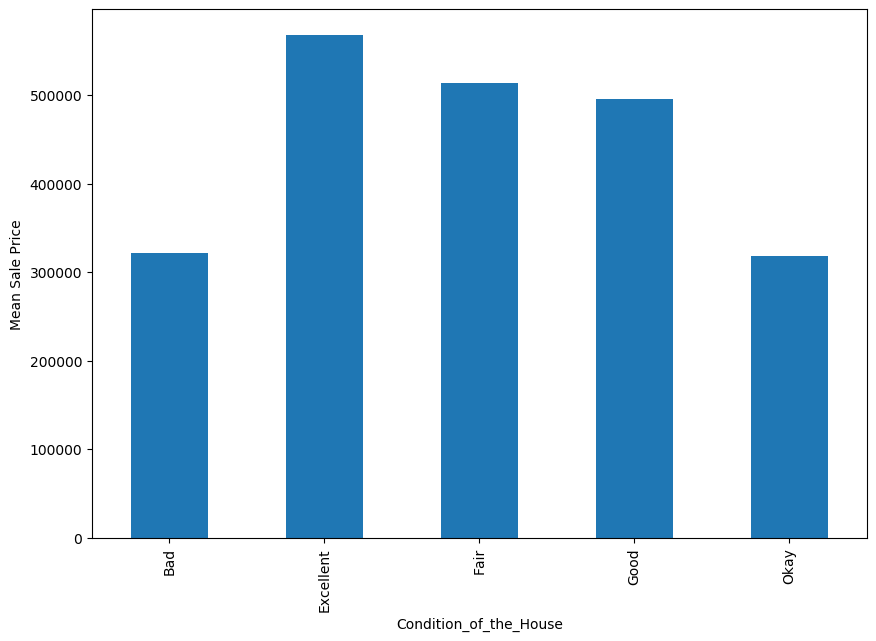

In [33]:
# Condition_of_the_House
plt.figure(dpi=100,figsize=(10,7))
df.groupby('Condition_of_the_House')['Sale_Price'].mean().plot(kind='bar')
plt.xlabel('Condition_of_the_House')
plt.ylabel('Mean Sale Price')
plt.show()

In [34]:
# Building the ANOVA table
from statsmodels.formula.api import ols
import statsmodels.api as sm

In [35]:
mod = ols('Sale_Price ~ Condition_of_the_House',data=df).fit()
anova_table = sm.stats.anova_lm(mod,typ=2)
anova_table

,sum_sq,df,F,PR(>F)
Condition_of_the_House,1.441831e+13,4.0,58.25563,5.447605e-49
Residual,1.336752e+15,21604.0,NaN,NaN


In [36]:
# As, F is quite large and p<0.05, 
# the null hypothesis isn't true and the alternative one is true

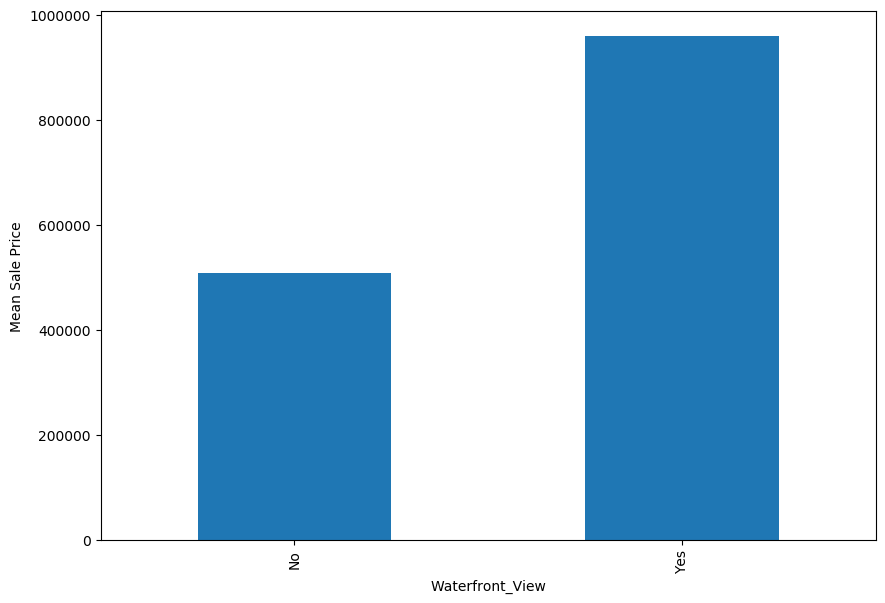

,sum_sq,df,F,PR(>F)
Waterfront_View,3.283737e+13,1.0,538.192683,1.275558e-117
Residual,1.318333e+15,21607.0,NaN,NaN


In [37]:
# Waterfront_View

plt.figure(dpi=100,figsize=(10,7))
df.groupby('Waterfront_View')['Sale_Price'].mean().plot(kind='bar')
plt.xlabel('Waterfront_View')
plt.ylabel('Mean Sale Price')
plt.show()

#Building the ANOVA table

mod = ols('Sale_Price ~ Waterfront_View',data=df).fit()
anova_table = sm.stats.anova_lm(mod,typ=2)
anova_table

In [38]:
# As, F is quite large and p<0.05, we can conclude 
# Waterfront_View has a deep impact on the Sale_Price

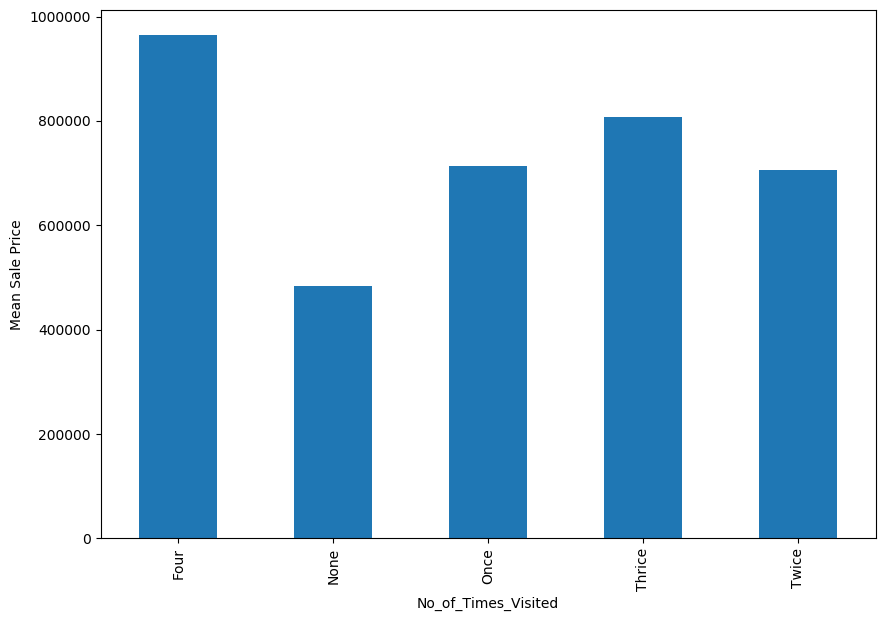

,sum_sq,df,F,PR(>F)
No_of_Times_Visited,1.760790e+14,4.0,809.301215,0.0
Residual,1.175091e+15,21604.0,NaN,NaN


In [39]:
# No_of_Times_Visited

plt.figure(dpi=100,figsize=(10,7))
df.groupby('No_of_Times_Visited')['Sale_Price'].mean().plot(kind='bar')
plt.xlabel('No_of_Times_Visited')
plt.ylabel('Mean Sale Price')
plt.show()

# Building ANOVA table

mod = ols('Sale_Price ~ No_of_Times_Visited',data=df).fit()
anova_table = sm.stats.anova_lm(mod,typ=2)
anova_table

In [40]:
# This category is also impactful

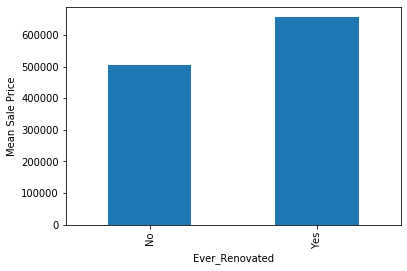

,sum_sq,df,F,PR(>F)
Ever_Renovated,1.998463e+13,1.0,324.378469,5.419055e-72
Residual,1.331185e+15,21607.0,NaN,NaN


In [41]:
# Ever_Renovated

df.groupby('Ever_Renovated')['Sale_Price'].mean().plot(kind='bar')
plt.xlabel('Ever_Renovated')
plt.ylabel('Mean Sale Price')
plt.show()

# Building ANOVA table

mod = ols('Sale_Price ~ Ever_Renovated',data=df).fit()
anova_table = sm.stats.anova_lm(mod,typ=2)
anova_table

In [42]:
# It's also impactful

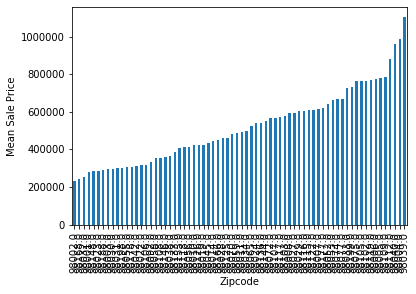

,sum_sq,df,F,PR(>F)
Zipcode,6.859657e+14,69.0,321.902033,0.0
Residual,6.652044e+14,21539.0,NaN,NaN


In [43]:
# Zipcode

df.groupby('Zipcode')['Sale_Price'].mean().sort_values().plot(kind='bar')
plt.xlabel('Zipcode')
plt.ylabel('Mean Sale Price')
plt.show()

# Building ANOVA table
mod = ols('Sale_Price ~ Zipcode',data=df).fit()
anova_table = sm.stats.anova_lm(mod,typ=2)
anova_table

In [44]:
# It's also impactful

In [45]:
# Now to covert these impactful categorical varibale into 
#Numerical Variable, we must create its dummy variable

In [46]:
df = pd.get_dummies(df, columns=['Ever_Renovated','Waterfront_View','Condition_of_the_House'],drop_first=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21609 entries, 0 to 21612
Data columns (total 27 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   ID                                        21609 non-null  int64  
 1   Date House was Sold                       21609 non-null  object 
 2   Sale_Price                                21609 non-null  float64
 3   No_of_Bedrooms                            21609 non-null  int64  
 4   No_of_Bathrooms                           21609 non-null  float64
 5   Flat_Area(in Sqft)                        21609 non-null  float64
 6   Lot_Area(in Sqft)                         21609 non-null  float64
 7   No_of_Floors                              21609 non-null  float64
 8   No_of_Times_Visited                       21609 non-null  object 
 9   Overall_Grade                             21609 non-null  int64  
 10  Area_of_the_House_from_Basement(in

In [47]:
df.head()

,ID,Date House was Sold,Sale_Price,No_of_Bedrooms,No_of_Bathrooms,Flat_Area(in Sqft),Lot_Area(in Sqft),No_of_Floors,No_of_Times_Visited,Overall_Grade,...,Living_Area_after_Renovation(in Sqft),Lot_Area_after_Renovation(in Sqft),Purchase_Year,Year_since_Renovation,Ever_Renovated_Yes,Waterfront_View_Yes,Condition_of_the_House_Excellent,Condition_of_the_House_Fair,Condition_of_the_House_Good,Condition_of_the_House_Okay
0,7129300520,14 October 2017,221900.0,3,1.00,1180.0,5650.0,1.0,None,7,...,1340.0,5650,2017,0,0,0,0,1,0,0
1,6414100192,14 December 2017,538000.0,3,2.25,2570.0,7242.0,2.0,None,7,...,1690.0,7639,2017,26,1,0,0,1,0,0
2,5631500400,15 February 2016,180000.0,2,1.00,770.0,10000.0,1.0,None,6,...,2720.0,8062,2016,0,0,0,0,1,0,0
3,2487200875,14 December 2017,604000.0,4,3.00,1960.0,5000.0,1.0,None,7,...,1360.0,5000,2017,0,0,0,1,0,0,0
4,1954400510,15 February 2016,510000.0,3,2.00,1680.0,8080.0,1.0,None,8,...,1800.0,7503,2016,0,0,0,0,1,0,0


In [48]:
len(df.Zipcode.unique())

70

In [49]:
# Direct creation of dummy variable of Zipcode will ruin the dataset
# by generating a huge number of features(69)
#That's why, first I'll bin the in 10 bins. As follows:

Zip_Table = df.groupby('Zipcode').agg({'Sale_Price':'mean'}).sort_values('Sale_Price',ascending=True)
Zip_Table.head()

,Sale_Price
Zipcode,
98002.0,234284.035176
98168.0,240328.371747
98032.0,251296.240000
98001.0,280804.690608
98148.0,284908.596491


In [50]:
Zip_Table['Zipcode_Group'] = pd.cut(Zip_Table['Sale_Price'], bins=10,
                                   labels = ['Zipcode_Group_0',
                                            'Zipcode_Group_1',
                                            'Zipcode_Group_2',
                                            'Zipcode_Group_3',
                                            'Zipcode_Group_4',
                                            'Zipcode_Group_5',
                                            'Zipcode_Group_6',
                                            'Zipcode_Group_7',
                                            'Zipcode_Group_8',
                                            'Zipcode_Group_9'],
                                   include_lowest = True)

In [51]:
Zip_Table = Zip_Table.drop(columns='Sale_Price')

In [52]:
Zip_Table.head()

,Zipcode_Group
Zipcode,
98002.0,Zipcode_Group_0
98168.0,Zipcode_Group_0
98032.0,Zipcode_Group_0
98001.0,Zipcode_Group_0
98148.0,Zipcode_Group_0


In [53]:
df = pd.merge(df,Zip_Table,left_on='Zipcode',how='left',right_index=True)

In [54]:
df

,ID,Date House was Sold,Sale_Price,No_of_Bedrooms,No_of_Bathrooms,Flat_Area(in Sqft),Lot_Area(in Sqft),No_of_Floors,No_of_Times_Visited,Overall_Grade,...,Lot_Area_after_Renovation(in Sqft),Purchase_Year,Year_since_Renovation,Ever_Renovated_Yes,Waterfront_View_Yes,Condition_of_the_House_Excellent,Condition_of_the_House_Fair,Condition_of_the_House_Good,Condition_of_the_House_Okay,Zipcode_Group
0,7129300520,14 October 2017,221900.0,3,1.00,1180.0,5650.0,1.0,None,7,...,5650,2017,0,0,0,0,1,0,0,Zipcode_Group_0
1,6414100192,14 December 2017,538000.0,3,2.25,2570.0,7242.0,2.0,None,7,...,7639,2017,26,1,0,0,1,0,0,Zipcode_Group_2
2,5631500400,15 February 2016,180000.0,2,1.00,770.0,10000.0,1.0,None,6,...,8062,2016,0,0,0,0,1,0,0,Zipcode_Group_2
3,2487200875,14 December 2017,604000.0,4,3.00,1960.0,5000.0,1.0,None,7,...,5000,2017,0,0,0,1,0,0,0,Zipcode_Group_3
4,1954400510,15 February 2016,510000.0,3,2.00,1680.0,8080.0,1.0,None,8,...,7503,2016,0,0,0,0,1,0,0,Zipcode_Group_4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,14 May 2017,360000.0,3,2.50,1530.0,1131.0,3.0,None,8,...,1509,2017,0,0,0,0,1,0,0,Zipcode_Group_3
21609,6600060120,15 February 2016,400000.0,4,2.50,2310.0,5813.0,2.0,None,8,...,7200,2016,0,0,0,0,1,0,0,Zipcode_Group_1
21610,1523300141,14 June 2017,402101.0,2,0.75,1020.0,1350.0,2.0,None,7,...,2007,2017,0,0,0,0,1,0,0,Zipcode_Group_3
21611,291310100,15 January 2016,400000.0,3,2.50,1600.0,2388.0,2.0,None,8,...,1287,2016,0,0,0,0,1,0,0,Zipcode_Group_4


In [55]:
df = pd.get_dummies(df,columns=['Zipcode_Group'],drop_first=True)
df.head()

,ID,Date House was Sold,Sale_Price,No_of_Bedrooms,No_of_Bathrooms,Flat_Area(in Sqft),Lot_Area(in Sqft),No_of_Floors,No_of_Times_Visited,Overall_Grade,...,Condition_of_the_House_Okay,Zipcode_Group_Zipcode_Group_1,Zipcode_Group_Zipcode_Group_2,Zipcode_Group_Zipcode_Group_3,Zipcode_Group_Zipcode_Group_4,Zipcode_Group_Zipcode_Group_5,Zipcode_Group_Zipcode_Group_6,Zipcode_Group_Zipcode_Group_7,Zipcode_Group_Zipcode_Group_8,Zipcode_Group_Zipcode_Group_9
0,7129300520,14 October 2017,221900.0,3,1.00,1180.0,5650.0,1.0,None,7,...,0,0,0,0,0,0,0,0,0,0
1,6414100192,14 December 2017,538000.0,3,2.25,2570.0,7242.0,2.0,None,7,...,0,0,1,0,0,0,0,0,0,0
2,5631500400,15 February 2016,180000.0,2,1.00,770.0,10000.0,1.0,None,6,...,0,0,1,0,0,0,0,0,0,0
3,2487200875,14 December 2017,604000.0,4,3.00,1960.0,5000.0,1.0,None,7,...,0,0,0,1,0,0,0,0,0,0
4,1954400510,15 February 2016,510000.0,3,2.00,1680.0,8080.0,1.0,None,8,...,0,0,0,0,1,0,0,0,0,0


## Hence, binning and creating dummies is completed.
### Now, the unnecessay features must be droped to make the dataset good

In [56]:
df.drop(columns=['ID','Zipcode','Date House was Sold','Purchase_Year','Renovated_Year'],inplace=True)

In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21609 entries, 0 to 21612
Data columns (total 31 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Sale_Price                                21609 non-null  float64
 1   No_of_Bedrooms                            21609 non-null  int64  
 2   No_of_Bathrooms                           21609 non-null  float64
 3   Flat_Area(in Sqft)                        21609 non-null  float64
 4   Lot_Area(in Sqft)                         21609 non-null  float64
 5   No_of_Floors                              21609 non-null  float64
 6   No_of_Times_Visited                       21609 non-null  object 
 7   Overall_Grade                             21609 non-null  int64  
 8   Area_of_the_House_from_Basement(in Sqft)  21609 non-null  float64
 9   Basement_Area(in Sqft)                    21609 non-null  int64  
 10  Age_of_House(in Years)            

In [58]:
df['No_of_Times_Visited'].unique()

array(['None', 'Thrice', 'Four', 'Twice', 'Once'], dtype=object)

In [59]:
mapping = {
    'None':0,
    'Once':1,
    'Twice':2,
    'Thrice':3,
    'Four':4
}

In [60]:
df['No_of_Times_Visited'] = df['No_of_Times_Visited'].map(mapping)

In [61]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21609 entries, 0 to 21612
Data columns (total 31 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Sale_Price                                21609 non-null  float64
 1   No_of_Bedrooms                            21609 non-null  int64  
 2   No_of_Bathrooms                           21609 non-null  float64
 3   Flat_Area(in Sqft)                        21609 non-null  float64
 4   Lot_Area(in Sqft)                         21609 non-null  float64
 5   No_of_Floors                              21609 non-null  float64
 6   No_of_Times_Visited                       21609 non-null  int64  
 7   Overall_Grade                             21609 non-null  int64  
 8   Area_of_the_House_from_Basement(in Sqft)  21609 non-null  float64
 9   Basement_Area(in Sqft)                    21609 non-null  int64  
 10  Age_of_House(in Years)            

In [62]:
df.shape

(21609, 31)

In [63]:
df

,Sale_Price,No_of_Bedrooms,No_of_Bathrooms,Flat_Area(in Sqft),Lot_Area(in Sqft),No_of_Floors,No_of_Times_Visited,Overall_Grade,Area_of_the_House_from_Basement(in Sqft),Basement_Area(in Sqft),...,Condition_of_the_House_Okay,Zipcode_Group_Zipcode_Group_1,Zipcode_Group_Zipcode_Group_2,Zipcode_Group_Zipcode_Group_3,Zipcode_Group_Zipcode_Group_4,Zipcode_Group_Zipcode_Group_5,Zipcode_Group_Zipcode_Group_6,Zipcode_Group_Zipcode_Group_7,Zipcode_Group_Zipcode_Group_8,Zipcode_Group_Zipcode_Group_9
0,221900.0,3,1.00,1180.0,5650.0,1.0,0,7,1180.0,0,...,0,0,0,0,0,0,0,0,0,0
1,538000.0,3,2.25,2570.0,7242.0,2.0,0,7,2170.0,400,...,0,0,1,0,0,0,0,0,0,0
2,180000.0,2,1.00,770.0,10000.0,1.0,0,6,770.0,0,...,0,0,1,0,0,0,0,0,0,0
3,604000.0,4,3.00,1960.0,5000.0,1.0,0,7,1050.0,910,...,0,0,0,1,0,0,0,0,0,0
4,510000.0,3,2.00,1680.0,8080.0,1.0,0,8,1680.0,0,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,360000.0,3,2.50,1530.0,1131.0,3.0,0,8,1530.0,0,...,0,0,0,1,0,0,0,0,0,0
21609,400000.0,4,2.50,2310.0,5813.0,2.0,0,8,2310.0,0,...,0,1,0,0,0,0,0,0,0,0
21610,402101.0,2,0.75,1020.0,1350.0,2.0,0,7,1020.0,0,...,0,0,0,1,0,0,0,0,0,0
21611,400000.0,3,2.50,1600.0,2388.0,2.0,0,8,1600.0,0,...,0,0,0,0,1,0,0,0,0,0


In [64]:
sum(df.isnull().sum()) # To check if there is any missing value

0

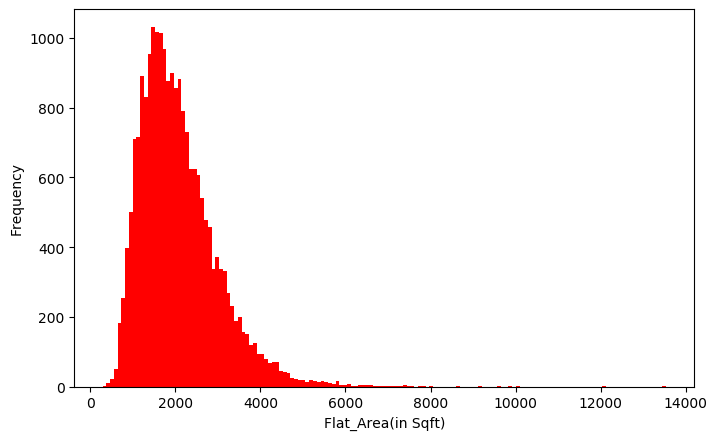

In [65]:
plt.figure(dpi=100,figsize=(8,5))

plt.hist(df['Flat_Area(in Sqft)'],bins=150,color='red')
plt.xlabel('Flat_Area(in Sqft)')
plt.ylabel('Frequency')
plt.show()

### As we know the independent variables should be distributed normally for good result.
### Hence, it's a right skewed distribution, a feature transformation operation(logarithm or nth root) should be executed.
### Creating a column by getting the logarithm of Flat_Area(in Sqft) column.

In [66]:
def log_transform(value):
    return np.log(value)

In [67]:
df['Trans_Flate_Area'] = df['Flat_Area(in Sqft)'].map(log_transform)

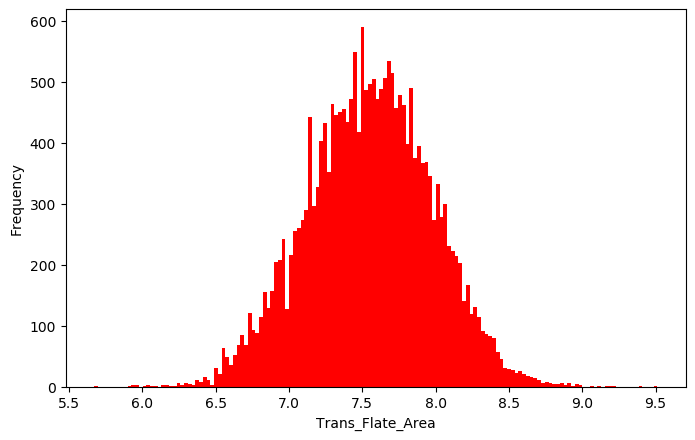

In [68]:
plt.figure(dpi=100,figsize=(8,5))

plt.hist(df['Trans_Flate_Area'],bins=150,color='red')
plt.xlabel('Trans_Flate_Area')
plt.ylabel('Frequency')
plt.show()

In [69]:
# Hence, the transformed variable is normally distributed, 
# we'll, therefore use this variable.
df.drop(columns=['Flat_Area(in Sqft)'],inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21609 entries, 0 to 21612
Data columns (total 31 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Sale_Price                                21609 non-null  float64
 1   No_of_Bedrooms                            21609 non-null  int64  
 2   No_of_Bathrooms                           21609 non-null  float64
 3   Lot_Area(in Sqft)                         21609 non-null  float64
 4   No_of_Floors                              21609 non-null  float64
 5   No_of_Times_Visited                       21609 non-null  int64  
 6   Overall_Grade                             21609 non-null  int64  
 7   Area_of_the_House_from_Basement(in Sqft)  21609 non-null  float64
 8   Basement_Area(in Sqft)                    21609 non-null  int64  
 9   Age_of_House(in Years)                    21609 non-null  int64  
 10  Latitude                          

### We can generate new features skiming through the existing features from the exisiting features.
### As an e.g. we can craete a categorical column stating either the house is luxury or not. Obviously luxury house has more sale price comparatively.
### For this, let's create an function.

In [70]:
def luxury(value):
    count = 0
    if value[0]>7.843849:
        count+=1
    if value[1]>3:
        count+=1
    if count>1:
        return 'Yes'
    else:
        return 'No'

In [71]:
df['Luxury_Home'] = df[['Trans_Flate_Area','No_of_Bathrooms']].apply(luxury,axis=1)
df['Luxury_Home'].unique()

array(['No', 'Yes'], dtype=object)

In [72]:
df['Luxury_Home'].value_counts()

No     20013
Yes     1596
Name: Luxury_Home, dtype: int64

In [73]:
# As it's a categorical data and there are only 2 unique values
# I can create dummies w/o binning.
# As follows:

df = pd.get_dummies(df, columns=['Luxury_Home'],drop_first=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21609 entries, 0 to 21612
Data columns (total 32 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Sale_Price                                21609 non-null  float64
 1   No_of_Bedrooms                            21609 non-null  int64  
 2   No_of_Bathrooms                           21609 non-null  float64
 3   Lot_Area(in Sqft)                         21609 non-null  float64
 4   No_of_Floors                              21609 non-null  float64
 5   No_of_Times_Visited                       21609 non-null  int64  
 6   Overall_Grade                             21609 non-null  int64  
 7   Area_of_the_House_from_Basement(in Sqft)  21609 non-null  float64
 8   Basement_Area(in Sqft)                    21609 non-null  int64  
 9   Age_of_House(in Years)                    21609 non-null  int64  
 10  Latitude                          

## Saving the modified file for dataset in the same directory

In [77]:
df.to_csv('Trans_Raw_Housing_Prices')# Saving the modified standardized dataset